In [ ]:
import numpy as np
import tensorflow.keras as nn
import matplotlib.pyplot as plt
import time
import pandas as pd
import time # to log time. Get current time with time.time()
from sklearn.model_selection import  train_test_split

def legend_out(): # Helper function for putting legend outside the plot
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

from tensorflow.keras.backend import clear_session

# helper plotting function
def plot_history_dt(history, dt=False):
    loss = history.history['loss']  
    val_loss = history.history['val_loss']
    epochs = len(loss)
    #times = history.history['times']
    #times = [sum(times[:i]) for i in range(1,len(times)+1)]
    if dt!=False:
        times = [dt/len(loss)]*len(loss)
        times = [sum(times[:i]) for i in range(1,len(times)+1)]
        plt.plot(times, loss, label="train loss")
        plt.plot(times, val_loss, label="val loss")
    else:
        plt.plot(loss, label="train loss")
        plt.plot(val_loss, label="val loss")
    legend_out()
    plt.show()


## Testing Dropout and Batchnormalization.


**Define** a model with the following structure:
A Feedforward Network (Dense layers) with three hidden layers.

Layer size = [100,100,100]+[output_size]

Then:
1. Define the same model but with Dropout applied to every layer but the last. Example with the functional model:


```
layer1 = nn.layers.Dense(100, activation="relu")
dropout = nn.layers.Dropout(0.2)(layer1) # dropout rate is 20%, i.e. 20% of the output of layer1 is set to 0.
...
```



2. Define the same model but with BatchNormalization. Example:



```
layer1 = nn.layers.Dense(100, activation="relu")
norm = nn.layers.BatchNormalization()(layer1) # we use all default parameters for the batch normalization.
...
```



**Compile** the models with appropriate loss functions and desired metrics (e.g. accuracy). We will use the dataset called Fasion MNIST, which has 10 classes. If you use, for example, `sparse_categorical_crossentropy` as loss then you do not have to make your labels categorical before training (because of the "sparse" marker)! :)

**Train** the models using the following setup:
  - Log the time, using the `time` package in a variable `dt`(delta time). 
  - Use Adam optimizer with learning rate set to 0.002
  - Use 20% of the training data as validation data with the validation_split argument.
  - Add the following Callbacks that monitor validation loss:
    - Early stopping `nn.callbacks.EarlyStopping(monitor="val_loss", patience=?)`
    - ReduceLROnPlataeu `nn.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=?)`
    - For both callbacks, set `patience` appropriately considering the two questions: Should ReduceLearning rate have more or less patience? How long do you wait before stopping training?

Plot the training and validation loss of the three models in relation to time of training. Hint: epochs can be tranformed to seconds trained if you use divide `dt` with number of epochs.

Comment on which model is best in terms of speed and performance.

Put this training procedure (the the best model) into a reusable function `def train_model(x_train,y_train, monitor_patience=[]))`. 

In [ ]:
## Load data
(x_train,y_train),(x_test,y_test) = nn.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28*28) # flattening the images here :)
x_train = x_train/255
x_test = x_test.reshape(len(x_test),28*28)
x_test = x_test/255
fashion_des =pd.read_html('https://keras.io/api/datasets/fashion_mnist/')[0]
fashion_des


,Label,Description
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


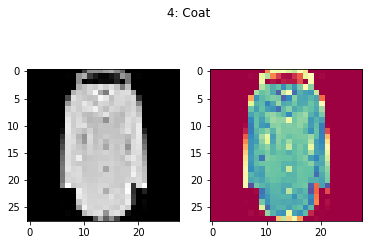

In [ ]:
# look at the data
import random
i = random.choice(range(len(x_train))) # take a random image
fig,axes = plt.subplots(1,2)
ax = axes[0]
ax.imshow(x_train[i].reshape(28,28),cmap=plt.cm.gray) # reshaping the single image back to (28,28) to visualise it.
ax = axes[1] 
ax.imshow(x_train[i].reshape(28,28),cmap=plt.cm.Spectral)
fig.suptitle('%d: %s'%(y_train[i],fashion_des.Description.values[y_train[i]]));

In [ ]:
# define and train the first model here (without dropout or batch normalization)


In [ ]:
# define and train model with dropout here


In [ ]:
# define and train model with batch normalization here


## Special layers for text data: Embeddings and RNNs
In previous exercises we have only used the simple feedforward layer, connecting to every node in the previous layer. In the following we try out more specialized layers, layers especially for sequential and categorical data, in particular text data.

# Embeddings
Embedding is a simple mapping from a categorical item (e.g. a word), to a weight vector. Basically you allow the model to learn a unique set of weights for each word. 
If you think of the Dense feedforward layer as an input duplicator, just with different filters (i.e. unique weighing of each input parameter) one for each node defined in the layer. This means that the number of parameters/weights in a dense layer is n_units * n_inputs. 
Embeddings do not duplicate the input, but give each word an n-dimensional representation a set of weight it can use to encode information. This means that the shape of the resulting ouput is (number of words in the input, embedding_size). This means that it has two dimensions, instead of one from the simple feedforward layer computing a weighed sum for each node. 
A standard feedforward layer expects a one-dimensional input, so to feed a twodimensional input forward in the network one have to either flatten the matrix or pool (e.g. take the average or maximum value accross embedding dimensions) the input matrix (here you can use the Flatten or the AveragePool pr MaxPool layer). When average or maxpooling you throw out a lot of information (both the order and the individual variance). Flattening keeps the order but has many dimensions, so the model has to learn very precise ordered interactions, (i.e. a filter weighing dimensions from the 1 words and the 52 word. A more interesting idea is to use a specialized layer for processing sequences. The RNN goes through a list of weight vectors and produce an output for each, while keeping a hidden state that that each vector (word representation) can interact through - i.e. by changing the state, and being transformed by the current state. In theory this allows word_0 to interact with word_52 in the sequence, however in practice it is hard to learn such longterm dependencies. But lets try it out.


### Train a Bidirectional LSTM Model.
1. Define a network with the following 4 layers / blocks (as LSTM is more a block consisting of multiple layers): Embedding layer, Bidrectional LSTM, Dense, Dense output layer.

The input_length to the embedding layer should equal 64 (the length of each sequence after running the `expand_data` funciton below), Embedding size should be 64, and LSTM should have 128 units, Dense should also have 128, and the final Dense layer should be chosen in relation to the number of classes in the prediction task. 
  - Embeddings take input the number of unique words, and the number of parameters for each word.
  - Hint: You need to flatten the LSTM output before you feed it forward.
2. Compile model. 
3. Train model.
4. Evaluate model.
5. Do the whole process but add dropout (both recurrent_dropout specific to the LSTM block ) and between the LSTM and the final layer. Evaluate model.




In [ ]:

### 
## Download data
## Import IMDB data
(x_train,y_train),(x_test,y_test) = nn.datasets.imdb.load_data()

""" 
Data description:
This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment 
(positive/negative). Reviews have been preprocessed, and each review is encoded 
as a list of word indexes (integers). For convenience, words are indexed by 
overall frequency in the dataset, so that for instance the integer "3" encodes 
the 3rd most frequent word in the data. This allows for quick filtering operations 
such as: "only consider the top 10,000 most common words, but eliminate the top 20 
most common words".

"""

## Function for making splitting documents into length 64.
def expand_data(x,y,max_size=64):
  new_x,new_y = [],[]
  for xi,yi in zip(x,y):
    for i in range(len(xi)//max_size):
      temp = xi[i*max_size:(i+1)*max_size]
      new_y.append(yi)
      new_x.append(temp)
  return np.array(new_x),np.array(new_y)


x_train,y_train = expand_data(x_train,y_train)
x_train,y_train = x_train,y_train
x_test,y_test = expand_data(x_test,y_test)
x_test,y_test = x_test,y_test
print(len(x_train),len(x_test))
w2id = nn.datasets.imdb.get_word_index()

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1)
print(x_train[0])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

80859 77724
[    7    15     8   140   187    12     9   444     6    55   737   829
   585    10    10     4   105    26    53    40  5249   133    19    64
    68  2857  6901     8  5390    23  1092  4826  3114  4021    42  2563
   186     8    30    32    15 17870   134    84   261    12    70    30
 11725    15    15  5981  3718    11 10225  2465     4   979     7     4
    65     4  2467   863]


In [ ]:
""" To view the original text, you can use this code to get the words from the indices"""

# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in w2id.items())

# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(decoded_sequence)

br for in through however that it loved is time talk leads murder i i of films he up just ross scene film see were chilling flock in dose are d sincere suffered blowing it's performed horror in at an for expelled while great believe that well at attachment for for obtain drunken this scan highlight of christmas br of their of peace surprise


In [ ]:
# HELPER
# As the vocab_size len(w2id) seems to be too small.
# Instead use the maximum index of the input data, max(c)+1

from collections import Counter
c = Counter()
for doc in list(x_train)+list(x_val)+list(x_test):
  c.update(Counter(doc))
len(c),len(w2id),max(w2id.values()),max(c)

(84440, 88584, 88584, 88586)

In [ ]:
# Solution goes here.


## Transfer learning using pretrained embeddings
In data setups with very few labeled examples transfer learning can be useful, also in the context of this rather simple model. Instead of learning the word embeddings from the task, we shall use pretrained embeddings. This exercise is designed for you to interact a little more with the model obejct, while simple transfer learning on text data. This means interacting with the weights to manually change them, and also adjusting which layers have trainable parameters in a simple transfer learning scheme. We will download the "Glove" embeddings from Gensim and match the Word embedding index from glove to the wordindex from Keras (`w2id`).

1. Build the same model as before (but with a larger embedding to match with pretrained Glove embeddings).
2. Build the embedding matrix with weights from Glove.
  - Hint: first define a matrix with random values between 0 and 1, and with shape `(vocab_size,emb_size)`, where vocab_size=max(c)+1. Then iterate through the w2id index and set the row of the embedding matrix with the glove representation:  `emb_model.get_vector(word)`. Use try-except to only update the matrix if the word in w2id also exists in `emb_model.get_vector(word)`.

The key to transfer learning is to avoid what is known as Catastrophic Forgetting, where the pretrained parts of the model are just forgotten during training. This is particularly a problem in the beginnig of training where gradients are large, as the model has yet to learn anything. Also a transfer learning model is often much to large relative to the amount of traning data -  no. parameters to no. labels examples. As we know this will lead to overfitting. To avoid this we limit the number of *trainable* parameters by "freezing" certain layers. That is the model can still be very large, but the parameters that learn are small. Once gradients have stabilized (due to much lower loss), one can finetune the pretrained parts also. 
### Transfor Learning Scheme: Freezing and Unfreezing
3. Freeze the embedding layer, by setting the `.trainable` attribute of that layer (`model.layers`) to `False`. (Hint: "Setting" just means a standard python assignment using the `=` sign.)
4. Train model for 3 epochs. 
5. Plot history and evaluate.
6. Unfreeze embedding layer and finetune for one epoch.
7. Evaluate.

In [ ]:
## Download embeddings.
import gensim.downloader as api
info = api.info()  # return dict with info about available models/datasets
print(info['models']['glove-wiki-gigaword-300'])
emb_model = api.load('glove-wiki-gigaword-300')

{'num_records': 400000, 'file_size': 394362229, 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py', 'license': 'http://opendatacommons.org/licenses/pddl/', 'parameters': {'dimension': 300}, 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).', 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.', 'read_more': ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf'], 'checksum': '29e9329ac2241937d55b852e8284e89b', 'file_name': 'glove-wiki-gigaword-300.gz', 'parts': 1}
[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
#your code here